In [2]:
попробовать улучшить cifar10 до 80%

SyntaxError: invalid syntax (2876357403.py, line 1)

In [1]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline
path = 'C:/Users/aliha/Desktop/Third/Computer Vision/Project4/DL/photos/'

In [4]:
pip3 install keras
# 

SyntaxError: invalid syntax (3009756337.py, line 1)

In [1]:
from keras.preprocessing.image import ImageDataGenerator


ModuleNotFoundError: No module named 'keras'

In [2]:
# width,height,channels
image_shape = (150,150,3)
batch_size = 20

In [8]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [9]:
train_image_gen = image_gen.flow_from_directory(path+'train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')
test_image_gen = image_gen.flow_from_directory(path+'test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 569 images belonging to 14 classes.
Found 135 images belonging to 1 classes.


In [10]:
len(train_image_gen)

29

# Creating the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# 13, because we have 13 classes_faces
model.add(Dense(14))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

### Training the Model

In [32]:
batch_size = 20
train_image_gen = image_gen.flow_from_directory('./photos/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 569 images belonging to 14 classes.


In [33]:
test_image_gen = image_gen.flow_from_directory('./photos/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 135 images belonging to 1 classes.


In [34]:
train_image_gen.class_indices

{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Daniyar Raiymbekov': 4,
 'Duisenov Alikhan': 5,
 'Kenzhebay Askar': 6,
 'Kyran Yerkin': 7,
 'Maxat Ualikhan': 8,
 'Naryshov Ernar': 9,
 'Rysmambetov Nurtugan': 10,
 'Sagynbek Nurbolat': 11,
 'Zhetessov Nur': 12,
 'Zhumabekov Magjan': 13}

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
results = model.fit_generator(train_image_gen,epochs=50,
                              steps_per_epoch=28,
                              validation_data=test_image_gen,
                             validation_steps=6)

Epoch 1/50
28/28 [==============================] - 72s 2s/step - loss: 2.6676 - accuracy: 0.0820 - val_loss: 37.0635 - val_accuracy: 0.5667
Epoch 2/50
28/28 [==============================] - 30s 1s/step - loss: 2.4513 - accuracy: 0.1803 - val_loss: 41.2229 - val_accuracy: 0.0250
Epoch 3/50
28/28 [==============================] - 30s 1s/step - loss: 2.1428 - accuracy: 0.2982 - val_loss: 44.7901 - val_accuracy: 0.0750
Epoch 4/50
28/28 [==============================] - 30s 1s/step - loss: 1.8176 - accuracy: 0.4262 - val_loss: 58.3870 - val_accuracy: 0.0167
Epoch 5/50
28/28 [==============================] - 30s 1s/step - loss: 1.5905 - accuracy: 0.4936 - val_loss: 65.2077 - val_accuracy: 0.1333
Epoch 6/50
28/28 [==============================] - 30s 1s/step - loss: 1.4451 - accuracy: 0.5501 - val_loss: 60.8039 - val_accuracy: 0.1333
Epoch 7/50
28/28 [==============================] - 30s 1s/step - loss: 1.3913 - accuracy: 0.5610 - val_loss: 73.5671 - val_accuracy: 0.1000
Epoch 8/50
28

In [37]:
#20 - 73%
#50 - 80%

In [38]:
# model.save('50epoch.h5')

# Evaluating the Model

In [39]:
results.history['accuracy']

[0.08196721225976944,
 0.1803278625011444,
 0.29821428656578064,
 0.4262295067310333,
 0.4936247766017914,
 0.5500910878181458,
 0.561020016670227,
 0.6047359108924866,
 0.6484517455101013,
 0.6612021923065186,
 0.6557376980781555,
 0.6958105564117432,
 0.693989098072052,
 0.7067395448684692,
 0.7122039794921875,
 0.748633861541748,
 0.7395263910293579,
 0.7741348147392273,
 0.7795992493629456,
 0.755919873714447,
 0.8087431788444519,
 0.7723132967948914,
 0.7795992493629456,
 0.7868852615356445,
 0.7978141903877258,
 0.806921660900116,
 0.8233151435852051,
 0.8269581198692322,
 0.8360655903816223,
 0.8579235076904297,
 0.8196721076965332,
 0.8251366019248962,
 0.8087431788444519,
 0.8360655903816223,
 0.8415300250053406,
 0.8324226140975952,
 0.8267857432365417,
 0.8652094602584839,
 0.8397085666656494,
 0.874316930770874,
 0.8615664839744568,
 0.8524590134620667,
 0.8597449660301208,
 0.8579235076904297,
 0.8706739544868469,
 0.8633880019187927,
 0.8633880019187927,
 0.85892856121063

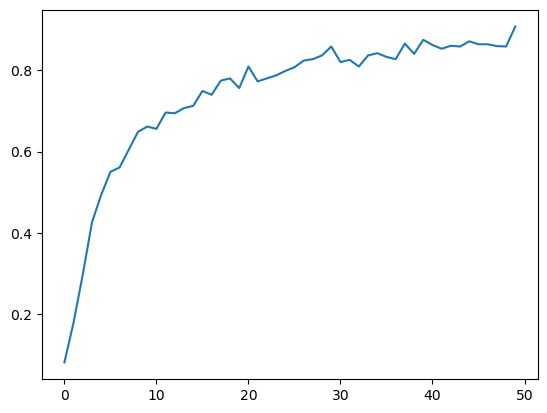

In [40]:
plt.plot(results.history['accuracy'])

In [41]:
# model.save('cat_dog_100epochs.h5')

# Predicting on new images

In [11]:
names = list(train_image_gen.class_indices.keys())

In [12]:
names

['Akhmedov Sanzhar',
 'Alikhan Zhamankhan',
 'Baibatchayeva Anar',
 'Dalabay Abylay',
 'Daniyar Raiymbekov',
 'Duisenov Alikhan',
 'Kenzhebay Askar',
 'Kyran Yerkin',
 'Maxat Ualikhan',
 'Naryshov Ernar',
 'Rysmambetov Nurtugan',
 'Sagynbek Nurbolat',
 'Zhetessov Nur',
 'Zhumabekov Magjan']

In [13]:
from keras.models import load_model


In [14]:
model = load_model('50epoch.h5')

In [15]:
import numpy as np
import keras.utils as image
ali_file = './photos/test/all/1.jpg'

ali_img = image.load_img(ali_file, target_size=(150, 150))

ali_img = image.img_to_array(ali_img)

ali_img = np.expand_dims(ali_img, axis=0)
ali_img = ali_img/255

In [16]:
prediction = model.predict(ali_img)
pred = np.argmax(prediction)
labels = (train_image_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels[pred]
# print(labels)
prediction[0][pred]


1/1 [==============================] - 0s 224ms/step


0.1729376

In [17]:
prediction

array([[0.06362019, 0.1729376 , 0.06362019, 0.06362019, 0.06362019,
        0.06362019, 0.06362019, 0.06362019, 0.06362019, 0.06362019,
        0.06362019, 0.06362019, 0.06362019, 0.06362019]], dtype=float32)

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
face_cascade = cv2.CascadeClassifier('C:/Users/aliha/Desktop/Third/Computer Vision/W3/DATA/haarcascades/haarcascade_frontalface_default.xml')


# Video Webcam

In [23]:

cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,  480))
while True:
    
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_rects = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0), 2)
        roi_face = frame[y:y+h, x:x+w]
        roi_gray = gray[y:y+h, x:x+w]
        img = roi_face.copy()
        img = cv2.resize(img, (150, 150))
        img = image.img_to_array(img)

        img = np.expand_dims(img, axis=0)
        img = img/255
        predictions = model.predict(img)
        pred = np.argmax(predictions)
        name = labels[pred]
        accuracy = predictions[0][pred] * 100
        cv2.putText(frame, f"{name}: {accuracy:.2f}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
    cv2.imshow('Face Detection', frame)
       
    
    k = cv2.waitKey(1)
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()
    

1/1 [==============================] - 0s 59ms/step


In [21]:
model1 = load_model('face7m2.h5')

In [22]:

cap = cv2.VideoCapture(0)
while True:
    
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_rects = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0), 2)
        roi_face = frame[y:y+h, x:x+w]
        roi_gray = gray[y:y+h, x:x+w]
        img = roi_face.copy()
        img = cv2.resize(img, (224, 224))
        img = image.img_to_array(img)

        img = np.expand_dims(img, axis=0)
        img = img/255
        predictions = model1.predict(img)
        pred = np.argmax(predictions)
        name = labels[pred]
        accuracy = predictions[0][pred] * 100
        cv2.putText(frame, f"{name}: {accuracy:.2f}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
    cv2.imshow('Face Detection', frame)
       
    
    k = cv2.waitKey(1)
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()
    

1/1 [==============================] - 0s 78ms/step
